In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCAfrom sklearn.linear_model import LogisticRegression


Import the data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/batch45/train.csv')
data.head(5)

In [5]:
X=data.drop('label',axis=1)
Y=data['label']


Spliting the data into train and test

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [8]:
pca1=PCA(n_components=2)

In [9]:
img_pro=pca1.fit_transform(X_train)

In [10]:
df=pd.DataFrame(img_pro,columns=['PCA1','PCA2'])
df['labels']=Y_train

 Perform PCA and display a 2d scatter plot. Observe the plot and color code the data points with respect to the class label.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


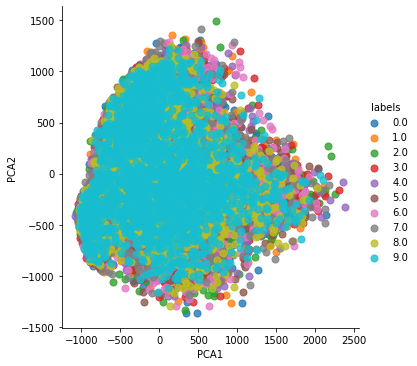

In [12]:
sns.lmplot('PCA1','PCA2',data=df,fit_reg=False,scatter_kws={'s':50},hue='labels')
plt.show()

Build a simple logisticregressionwith only pca_ncomponents_=2 columns

In [ ]:
lr=LogisticRegression()

In [ ]:
lr_model=lr.fit(img_pro,Y_train)

In [23]:
y_predict_train=lr_model.predict(img_pro)
training_Score = accuracy_score(Y_train,y_predict_train)
training_Score

0.43425170068027213

In [26]:
test_image=pca1.transform(X_test)
y_predict_test=lr_model.predict(test_image)
testing_Score = accuracy_score(Y_test,y_predict_test)
testing_Score


0.4346031746031746

Apply Logisticregression with complete data

In [76]:
lr1=LogisticRegression()

In [ ]:
lr_complete_columns=lr1.fit(X_train,Y_train)

In [78]:
y1_predict_train=lr_complete_columns.predict(X_train)
training_Score = accuracy_score(Y_train,y1_predict_train)
training_Score

0.9430952380952381

In [79]:
y1_predict_test=lr_complete_columns.predict(X_test)
testing_Score = accuracy_score(Y_test,y1_predict_test)
testing_Score

0.9111111111111111

By using PCA fetching 90% of data

In [27]:
pca2=PCA(0.90)

In [29]:
final_model=pca2.fit_transform(X_train)

My final columns number

In [30]:
pca2.n_components_

87

Building Logistic model on PCA

In [ ]:
lr_pca=LogisticRegression()
lr_pca_model=lr_pca.fit(second_model,Y_train)

In [92]:
y_lr_pca_pred=lr_pca_model.predict(second_model)
lr_pca_acc_score=accuracy_score(Y_train,y_lr_pca_pred)
lr_pca_acc_score

0.9179591836734694

In [93]:
test_lr_pca=pca2.transform(X_test)
ytest_lr_test_pred=lr_pca_model.predict(test_lr_pca)
acc_score_test=accuracy_score(Y_test,ytest_lr_test_pred)
acc_score_test

0.9062698412698412

Building a SVC model 

In [32]:
svc_model=SVC()

In [33]:
svc_model.fit(second_model,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
y_svc_pred=svc_model.predict(second_model)

In [35]:
acc_score=accuracy_score(Y_train,y_svc_pred)
acc_score

0.991156462585034

In [83]:
test_svc=pca2.transform(X_test)
ytest_svc_pred=svc_model.predict(test_svc)
acc_score_test=accuracy_score(Y_test,ytest_svc_pred)
acc_score_test

0.9788888888888889

Testing manually

In [ ]:
plt.imshow(np.array(X_train.loc[120]).reshape(28,28))

In [ ]:
Y_train.loc[120]

In [ ]:
plt.imshow(np.array(X_test.loc[57]).reshape(28,28))

In [ ]:
Y_test.loc[57]


In [99]:
dataframe={'Name':['logistic','SVC'],
           'Train accuracy before PCA':['0.9430952380952381','0.940952380952381'],
           'Test accuracy before PCA':['0.9111111111111111','0.9738095238095238'],
           "Train accuracy after PCA":['0.9179591836734694','0.991156462585034'],
           'Test accuracy after PCA':['0.9062698412698412','0.9788888888888889']}

 Compare the model performance before and after PCA.

In [100]:
pd.DataFrame(dataframe)

,Name,Train accuracy before PCA,Test accuracy before PCA,Train accuracy after PCA,Test accuracy after PCA
0,logistic,0.9430952380952381,0.9111111111111111,0.9179591836734694,0.9062698412698412
1,SVC,0.940952380952381,0.9738095238095238,0.991156462585034,0.9788888888888889


By apply PCA on this data SVC model gives best accracy